In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import skimage
import os

In [2]:
def cut_image(img):
    img_float = skimage.img_as_float(img)
    height = img_float.shape[0] // 3
    frame = int(img.shape[0]*0.05)
    
    blue_img = img_float[frame: height-frame, frame:img_float.shape[1]-frame]
    green_img = img_float[height + frame : 2*height-frame, frame:img_float.shape[1]-frame]
    red_img = img_float[2*height + frame : 3*height-frame, frame:img_float.shape[1]-frame]
    return blue_img, green_img, red_img

In [3]:
def max_corr(img_init, img_shift, shift):
    corr_dict = dict()
    for x in range(-shift,shift):
        img_roll_x = np.roll(img_shift, x, 0)
        for y in range(-shift, shift):
            img_roll_y = np.roll(img_roll_x, y, 1)
            corr = (img_roll_y * img_init).sum()
            corr_dict[corr] = (x,y)
    return max(corr_dict.keys()), corr_dict[max(corr_dict.keys())]

In [4]:
def align(img):
    blue_img, green_img, red_img = cut_image(img)
    max_corr_blue, max_corr_coord_blue = max_corr(green_img, blue_img, 15)
    max_corr_red, max_corr_coord_red = max_corr(green_img, red_img, 15)
    
    red_img = np.roll(red_img, max_corr_coord_red[0], axis=0)
    red_img = np.roll(red_img, max_corr_coord_red[1], axis=1)
    blue_img = np.roll(blue_img, max_corr_coord_blue[0], axis=0)
    blue_img = np.roll(blue_img, max_corr_coord_blue[1], axis=1)
    return np.dstack((red_img, green_img, blue_img))

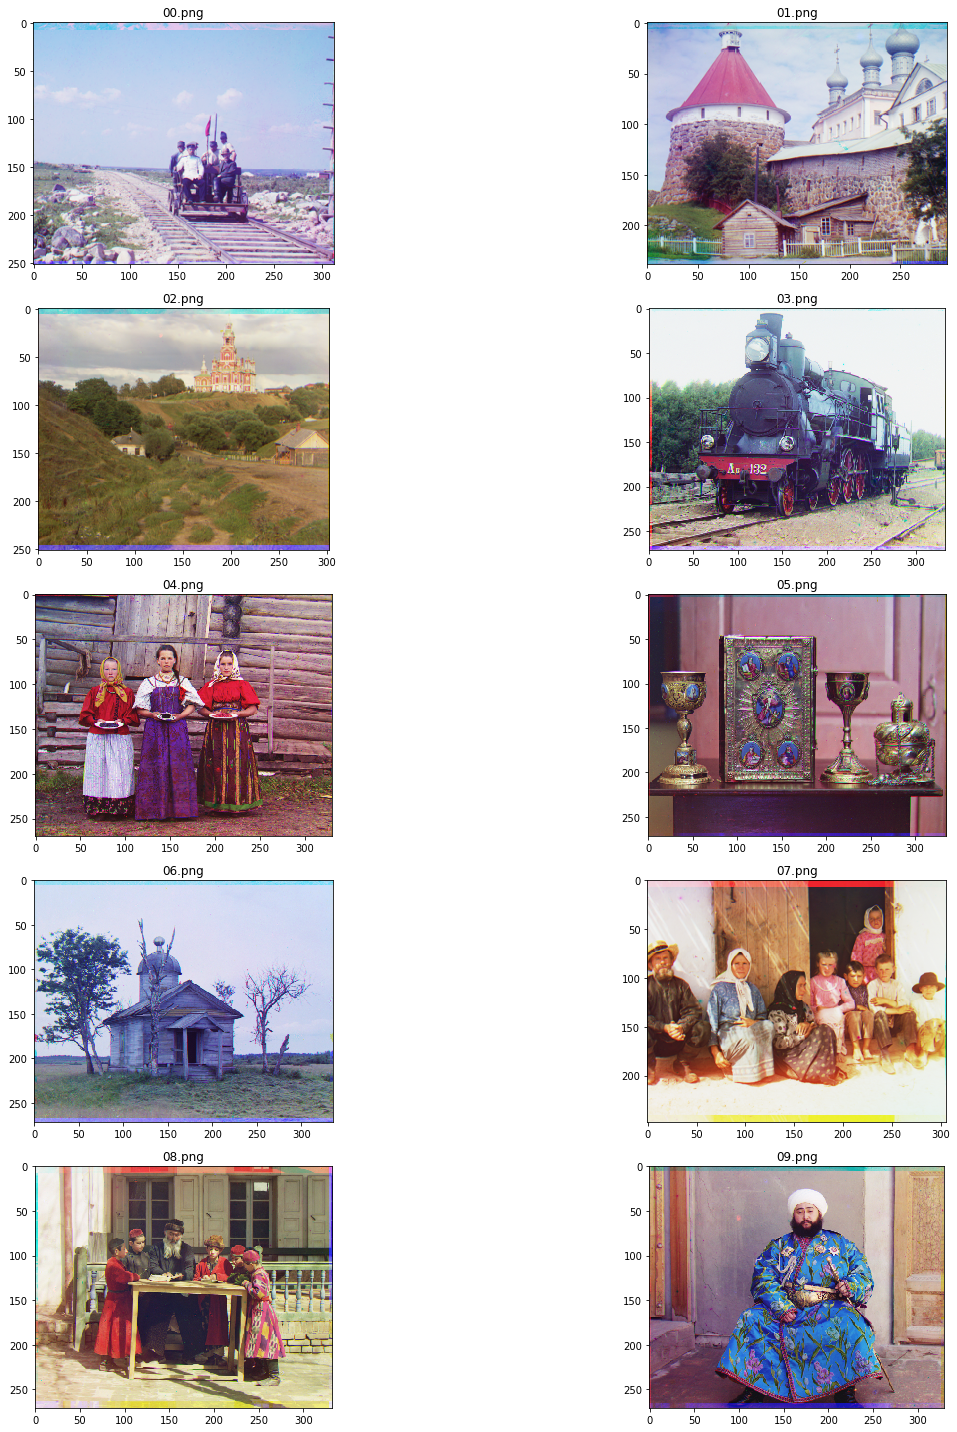

In [7]:
img_names = os.listdir('data_img')
fig = plt.figure(figsize=(30,20))
for indx in range(len(img_names)):
    img = skimage.io.imread('data_img/' + img_names[indx])
    res = align(img)
    ax = fig.add_subplot(5, 2, indx+1)
    ax.set_title(img_names[indx])
    skimage.io.imshow(res)